In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Broadcasting in Numpy

```
p = max(m, n)
if m < p:
    left-pad A's shape with 1s until it also has p dimensions
else if n < p:
    left-pad B's shape with 1s until it also has p dimensions
result_dims = new list with p elements
for i in p-1 ... 0:
    A_dim_i = A.shape[i]
    B_dim_i = B.shape[i]
    if A_dim_i != 1 and B_dim_i != 1 and A_dim_i != B_dim_i:
        raise ValueError("could not broadcast")
    else:
        # Pick the Array which is having maximum Dimension
        result_dims[i] = max(A_dim_i, B_dim_i) 
```

Broadcasting arrays is possible if the following rules are met: 

- If the arrays don’t have the same rank then prepend the shape of the lower rank array with 1s until both shapes have the same length, padding left with ones
- The two arrays are compatible in a dimension if they have the same size in the dimension or if one of the arrays has size 1 in that dimension.
- The arrays can be broadcast together if they are compatible with all dimensions.
- After broadcasting, each array behaves as if it had a shape equal to the element-wise maximum of shapes of the two input arrays.
- In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

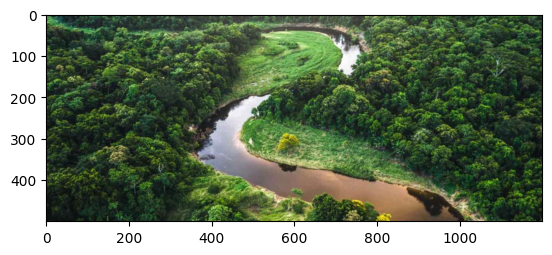

In [5]:
image = cv2.imread('./img/nature.png')
image = image[:, : , [2,1,0]]
plt.imshow(image)

In [6]:
vector_transformation = np.array([0.072, 0.715, 0.213])
image.shape, vector_transformation.shape

((500, 1200, 3), (3,))

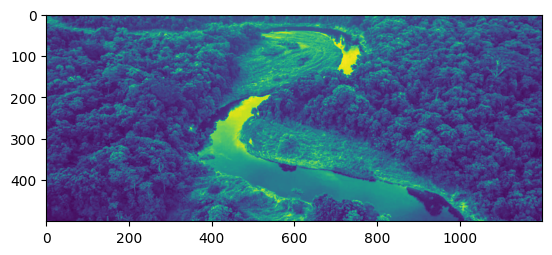

In [9]:
plt.imshow(np.matmul(image, vector_transformation))

# Background Subtraction

In [11]:
img = cv2.imread("./img/StillImage.png")
img = cv2.resize(img, (640, 480))

background = cv2.imread("./img/background.png")
background = cv2.resize(background, (640, 480))

fake_background = cv2.imread("./img/FakeBackground.png")
fake_background = cv2.resize(fake_background, (640, 480))

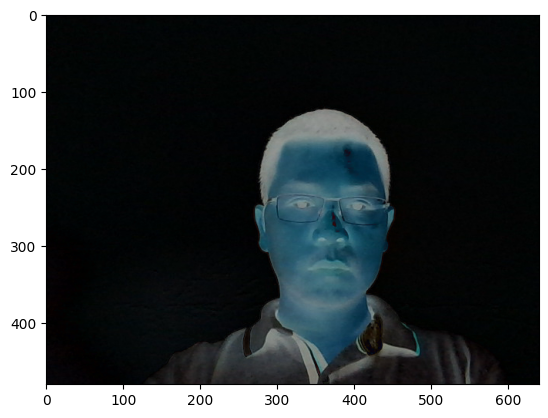

In [14]:
subtracted_image = cv2.absdiff(img, background)
plt.imshow(subtracted_image[:, :, ::-1])

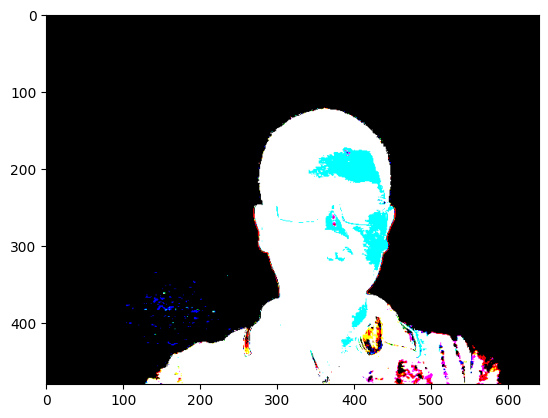

In [25]:
ret, difference_binary = cv2.threshold(
    subtracted_image,
    15, 
    255,
    cv2.THRESH_BINARY    
)
plt.imshow(difference_binary[:, :, ::-1])

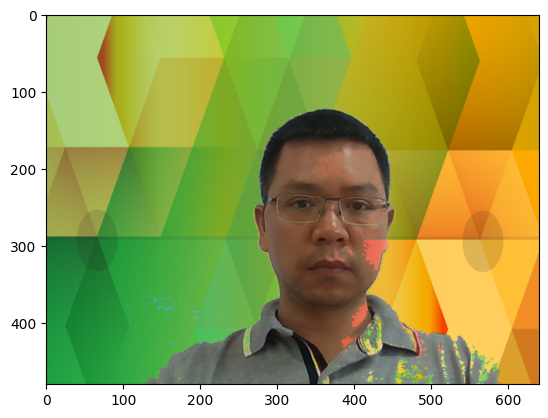

In [26]:
output = np.where(
    difference_binary == 0,
    fake_background,
    img
)
plt.imshow(output[:, :, [2,1,0]])

# Einstein Sum


In [2]:
import numpy as np

In [4]:
u = np.array(
    [3, 2, 4, 1]
)
v = np.array(
    [2, 1, 0, 3]
)
r = np.einsum('i,i->', u, v)
r

np.int64(11)

In [8]:
print(np.einsum('i,j->j', u, v))
print(np.einsum('i,j->i', u, v))

[20 10  0 30]
[18 12 24  6]


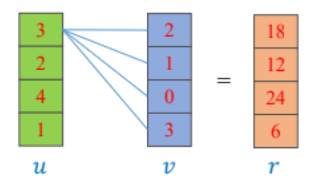

In [9]:
r = np.einsum('i,j->ij', u, v)
r

array([[ 6,  3,  0,  9],
       [ 4,  2,  0,  6],
       [ 8,  4,  0, 12],
       [ 2,  1,  0,  3]])

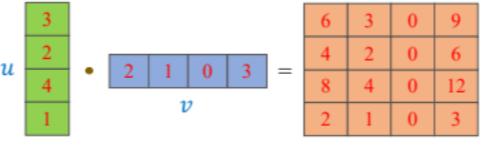

In [10]:
M = np.array(
    [
        [0, 2, 1],
        [3, 1, 4]
    ]
)
print(M.shape)
r = np.einsum('ij->ji', M)
print(r)
print(r.shape)


(2, 3)
[[0 3]
 [2 1]
 [1 4]]
(3, 2)


In [12]:
M = np.array(
    [
        [5, 2, 2],
        [3, 1, 6],
        [2, 4, 3]
    ]
)
r = np.einsum('ii->i', M)
r # -> diagonal

array([5, 1, 3])

In [13]:
r = np.einsum('ii->', M)
r # ->trace

np.int64(9)

In [14]:
A = np.array(
    [
        [3, 0, 1],
        [2, 2, 3]
    ]
)
B = np.array(
    [
        [1, 0, 2],
        [3, 2, 1]
    ]
)
np.einsum('ij,ij->ij', A, B) #elemnt wise multiplication


array([[3, 0, 2],
       [6, 4, 3]])

In [16]:
A = np.array(
    [
        [3, 0, 1],
        [2, 2, 3]
    ]
)
B = np.array(
    [
        [2, 5],
        [0, 1],
        [3, 4]
    ]
)
print(np.einsum('ij,jk->ik', A, B))
print(np.matmul(A, B))

[[ 9 19]
 [13 24]]
[[ 9 19]
 [13 24]]


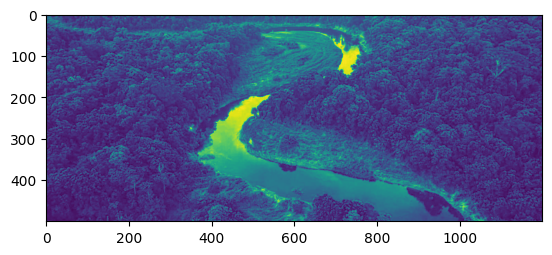

In [23]:
img = cv2.imread('./img/nature.png',1)[:, :, ::-1]
transform = np.array([0.072, 0.213, 0.715])

output = np.einsum(
    'ijk,k->ij',
    img,
    transform
)
plt.imshow(output)